<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Dependencies" data-toc-modified-id="Dependencies-1">Dependencies</a></span></li><li><span><a href="#Paths" data-toc-modified-id="Paths-2">Paths</a></span></li><li><span><a href="#Main" data-toc-modified-id="Main-3">Main</a></span><ul class="toc-item"><li><span><a href="#Remove-cell-lines" data-toc-modified-id="Remove-cell-lines-3.1">Remove cell lines</a></span></li><li><span><a href="#Duplicated-samples-(includes-cell-lines)" data-toc-modified-id="Duplicated-samples-(includes-cell-lines)-3.2">Duplicated samples (includes cell lines)</a></span></li><li><span><a href="#Sample-types" data-toc-modified-id="Sample-types-3.3">Sample types</a></span></li><li><span><a href="#Sufficient-sample-size" data-toc-modified-id="Sufficient-sample-size-3.4">Sufficient sample size</a></span></li><li><span><a href="#Clustering-cleanup" data-toc-modified-id="Clustering-cleanup-3.5">Clustering cleanup</a></span></li></ul></li><li><span><a href="#Sankey-plot" data-toc-modified-id="Sankey-plot-4">Sankey plot</a></span></li></ul></div>

# Dependencies

In [1]:
library(ggforce)

Loading required package: ggplot2



In [2]:
source("~/OneDrive - UHN/R_src/ggplot2_theme.R")

# Paths

In [3]:
manifestpath <- "/Users/anabbi/OneDrive - UHN/Documents/IPD2/Manifests/"
datapath <- "/Users/anabbi/OneDrive - UHN/Documents/IPD2/Data/"
plotpath <- "/Users/anabbi/OneDrive - UHN/Documents/IPD2/Plots/"

# Main

Start with RSEM manifest file 

In [4]:
CBTN_RNA_manifest_genes <- read.csv(paste0(manifestpath, "CBTTC_RSEM-manifest.csv"),header = TRUE, stringsAsFactors = FALSE)

In [5]:
dim(CBTN_RNA_manifest_genes)

[1] 996  20

In [6]:
CBTN_samples <- cbind.data.frame(CBTN_RNA_manifest_genes$sample_id,
                                 CBTN_RNA_manifest_genes$aliquot_id, stringsAsFactors = F)
colnames(CBTN_samples) <- c("CBTN_sample_id", "CBTN_aliquot_id")

In [7]:
CBTN_samples$CBTN_sample_aliquot <- paste0(CBTN_samples$CBTN_sample_id,"_", CBTN_samples$CBTN_aliquot_id)

In [8]:
CBTN_samples$CBTN <- "CBTN\nsamples\n(n = 996)"

In [9]:
head(CBTN_samples)

,CBTN_sample_id,CBTN_aliquot_id,CBTN_sample_aliquot,CBTN
,<chr>,<chr>,<chr>,<chr>
1,7316-464,746062,7316-464_746062,CBTN samples (n = 996)
2,7316-2724,717144,7316-2724_717144,CBTN samples (n = 996)
3,7316-4028,724089,7316-4028_724089,CBTN samples (n = 996)
4,7316-516,571424,7316-516_571424,CBTN samples (n = 996)
5,7316-1766,717142,7316-1766_717142,CBTN samples (n = 996)
6,7316-3336,739926,7316-3336_739926,CBTN samples (n = 996)


## Remove cell lines

In [10]:
CBTN_celllines <- read.csv(paste0(manifestpath,"cell_line_RNAalqids_CBTTC.csv"), header = TRUE, stringsAsFactors = F)

In [11]:
head(CBTN_celllines)

,case_id,patient_id,clinical_event,cell_lines_rnaalq_id,X
,<chr>,<chr>,<chr>,<chr>,<lgl>
1,C216603,PT_4347ZBEX,7316-913,739931,NA
2,C22878,PT_TGQY3X3W,7316-24,739935,NA
3,C28290,PT_3AWKWXEV,7316-85,740005,NA
4,C337143,PT_C2D4JXS1,7316-1746,739942,NA
5,C377856,PT_Z4PJA6KT,7316-1763,739939,NA
6,C56826,PT_Y5KY6KN9,7316-195,739937,NA


In [12]:
CBTN_celllines$sample_aliquot_id <- paste0(CBTN_celllines$clinical_event, "_", CBTN_celllines$cell_lines_rnaalq_id)

In [13]:
cellines <- CBTN_samples$CBTN_sample_aliquot[ CBTN_samples$CBTN_sample_aliquot %in% CBTN_celllines$sample_aliquot_id]
not_celllines <- CBTN_samples$CBTN_sample_aliquot[!CBTN_samples$CBTN_sample_aliquot %in% CBTN_celllines$sample_aliquot_id]

In [14]:
CBTN_samples$Cell_lines <- NA
CBTN_samples$Cell_lines[ CBTN_samples$CBTN_sample_aliquot %in% cellines] <- 
paste0("Cell lines\n(n = ", length(cellines), ")")

CBTN_samples$Cell_lines[CBTN_samples$CBTN_sample_aliquot %in% not_celllines] <- 
paste0("Tumours\n(n = ", length(not_celllines), ")")

In [15]:
table(CBTN_samples$Cell_lines)


Cell lines\n(n = 22)   Tumours\n(n = 974) 
                  22                  974 

In [16]:
head(CBTN_samples)

,CBTN_sample_id,CBTN_aliquot_id,CBTN_sample_aliquot,CBTN,Cell_lines
,<chr>,<chr>,<chr>,<chr>,<chr>
1,7316-464,746062,7316-464_746062,CBTN samples (n = 996),Tumours (n = 974)
2,7316-2724,717144,7316-2724_717144,CBTN samples (n = 996),Tumours (n = 974)
3,7316-4028,724089,7316-4028_724089,CBTN samples (n = 996),Tumours (n = 974)
4,7316-516,571424,7316-516_571424,CBTN samples (n = 996),Tumours (n = 974)
5,7316-1766,717142,7316-1766_717142,CBTN samples (n = 996),Tumours (n = 974)
6,7316-3336,739926,7316-3336_739926,CBTN samples (n = 996),Tumours (n = 974)


## Duplicated samples (includes cell lines)

In [17]:
CBTN_RNA_manifest_genes$sample_aliquot_id <- paste0(CBTN_RNA_manifest_genes$sample_id, "_", CBTN_RNA_manifest_genes$aliquot_id)

In [18]:
CBTN_RNA_manifest_genes_dedup <- CBTN_RNA_manifest_genes[!duplicated(CBTN_RNA_manifest_genes$sample_id),]

In [19]:
dim(CBTN_RNA_manifest_genes_dedup)

[1] 973  21

In [20]:
dedup_ids <- CBTN_RNA_manifest_genes_dedup$sample_aliquot_id

In [21]:
dup_ids <- CBTN_RNA_manifest_genes$sample_aliquot_id[duplicated(CBTN_RNA_manifest_genes$sample_id)]

In [22]:
dup_ids

[1] "7316-14_8711"     "7316-913_739931"  "7316-913_739932"  "7316-87_62332"   
 [5] "7316-85_740010"   "7316-85_398059"   "7316-1893_470029" "7316-1746_739941"
 [9] "7316-1746_574552" "7316-158_746061"  "7316-1765_728295" "7316-1763_739939"
[13] "7316-1763_549574" "7316-178_608917"  "7316-195_739937"  "7316-195_564443" 
[17] "7316-2176_588280" "7316-2189_740008" "7316-3058_739934" "7316-3058_746065"
[21] "7316-2151_711713" "7316-1463_571407" "7316-1769_470030"

In [23]:
CBTN_samples$duplicated_samples <- NA

CBTN_samples$duplicated_samples[CBTN_samples$CBTN_sample_aliquot %in% dup_ids] <- 
paste0("Duplicated\nsamples\n(n = ",length(dup_ids), ")") 
CBTN_samples$duplicated_samples[CBTN_samples$CBTN_sample_aliquot %in% dedup_ids] <-
paste0("Unique\nsamples\n(n = ",length(dedup_ids), ")") 

In [24]:
table(CBTN_samples$duplicated_samples, useNA = "always")


Duplicated\nsamples\n(n = 23)    Unique\nsamples\n(n = 973) 
                           23                           973 
                         <NA> 
                            0 

## Sample types

In [25]:
load(file = paste0(manifestpath,"Master_manifest.RData"))

In [26]:
cbtn_metadata <- IPD_metadata[ IPD_metadata$group == "CBTTC",]

In [27]:
cbtn_metadata$sample_aliquot_id <- paste0(cbtn_metadata$sample_id, "_", cbtn_metadata$aliquot_id)

In [28]:
table(cbtn_metadata$sample_type, useNA = "always")


Initial CNS Tumor       Progressive        Recurrence Second Malignancy 
              730               153                70                16 
             <NA> 
                0 

In [29]:
length(cbtn_metadata$sample_type)

[1] 969

In [30]:
primaries <- cbtn_metadata$sample_id[cbtn_metadata$sample_type == "Initial CNS Tumor"]
progressives <- cbtn_metadata$sample_id[cbtn_metadata$sample_type== "Progressive"]
recurrences <- cbtn_metadata$sample_id[cbtn_metadata$sample_type == "Recurrence"]
secondmalig <- cbtn_metadata$sample_id[cbtn_metadata$sample_type == "Second Malignancy"]

In [31]:
CBTN_samples$tumour_type <- NA

CBTN_samples$tumour_type[CBTN_samples$CBTN_sample_id %in% primaries] <- 
paste0("Primary\n(n = ", 
       length(CBTN_samples$CBTN_sample_id[CBTN_samples$CBTN_sample_id %in% primaries]), ")")

CBTN_samples$tumour_type[ CBTN_samples$CBTN_sample_id %in% progressives] <- 
paste0("Progressive\n(n = ", 
       length(CBTN_samples$CBTN_sample_id[CBTN_samples$CBTN_sample_id %in% progressives]), ")")

CBTN_samples$tumour_type[ CBTN_samples$CBTN_sample_id %in% recurrences ] <- 
paste0("Recurrence\n(n = ", 
       length(CBTN_samples$CBTN_sample_id[CBTN_samples$CBTN_sample_id %in% recurrences]), ")")

CBTN_samples$tumour_type[ CBTN_samples$CBTN_sample_id %in% secondmalig ] <- 
paste0("Second\nmalignancy\n(n = ", 
       length(CBTN_samples$CBTN_sample_id[CBTN_samples$CBTN_sample_id %in% secondmalig]), ")")

In [32]:
table(CBTN_samples$tumour_type, useNA = "always")


          Primary\n(n = 744)       Progressive\n(n = 158) 
                         744                          158 
        Recurrence\n(n = 71) Second\nmalignancy\n(n = 19) 
                          71                           19 
                        <NA> 
                           4 

In [33]:
CBTN_samples$CBTN_sample_id[is.na(CBTN_samples$tumour_type)]
#all are cellline entries from initial CNS tumours

[1] "7316-765"  "7316-1464" "7316-278"  "7316-135"

In [34]:
# add those 4 unannotated samples using original clinical csv file
CBTTC_clinical <- read.csv(paste0(manifestpath,"CBTTC_clinical.csv"),header = TRUE, stringsAsFactors = FALSE, na.strings = c("", NA))

In [35]:
CBTTC_clinical[ CBTTC_clinical$CBTTC.Event.ID %in% CBTN_samples$CBTN_sample_id[is.na(CBTN_samples$tumour_type)],]

,CBTTC.Subject.ID,CBTTC.Event.ID,Kids.Subject.ID,Group,Cohort,Sample.Clinical.Event.Origin,Gender,Race,Ethnicity,Diagnosis.a,⋯,Primary.Site.a,Primary.Site.b,Primary.Site.c,Primary.Site.d,Primary.Site.e,Primary.Site.f,Primary.Site.g,Age.at.Collection,Last.Known.Status,Age.At.Last.Known.Status..if.deceased..this.is.days.to.death.
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
82,C132594,7316-765,PT_80NVYCBS,CBTTC,EP,Initial CNS Tumor,Male,Other,Hispanic or Latino,Ependymoma,⋯,Temporal Lobe,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,5589,Alive,5589
240,C25830,7316-278,PT_9S6WMQ92,CBTTC,MB,Initial CNS Tumor,Female,White,Not Hispanic or Latino,Medulloblastoma,⋯,Cerebellum/Posterior Fossa,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,5534,Deceased-due to disease,7042
430,C15498,7316-1464,PT_CSZ9QA1N,CBTTC,HGG,Initial CNS Tumor,Female,White,Not Hispanic or Latino,High-grade glioma/astrocytoma (WHO grade III/IV),⋯,Brain Stem- Midbrain/Tectum,Cerebellum/Posterior Fossa,Optic Pathway,Suprasellar/Hypothalamic/Pituitary,Temporal Lobe,Thalamus,Not Applicable,1886,Deceased-due to disease,3633
603,C58548,7316-135,PT_RFGZ2JGP,CBTTC,MB,Initial CNS Tumor,Female,White,Not Hispanic or Latino,Medulloblastoma,⋯,Cerebellum/Posterior Fossa,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,4240,Alive,5257


In [36]:
primaries <- c(primaries, CBTN_samples$CBTN_sample_id[is.na(CBTN_samples$tumour_type)])

In [37]:
CBTN_samples$tumour_type[CBTN_samples$CBTN_sample_id %in% primaries] <- 
paste0("Primary\n(n = ", 
       length(CBTN_samples$CBTN_sample_id[CBTN_samples$CBTN_sample_id %in% primaries]), ")")

In [38]:
table(CBTN_samples$tumour_type, useNA = "always")


          Primary\n(n = 748)       Progressive\n(n = 158) 
                         748                          158 
        Recurrence\n(n = 71) Second\nmalignancy\n(n = 19) 
                          71                           19 
                        <NA> 
                           0 

## Sufficient sample size

In [47]:
load(file = paste0(datapath,"ESTIMATE/estimate_manifest_primary.RData"))

In [48]:
load(file = paste0(datapath,"ESTIMATE/estimate_manifest_primary_clean.RData"))

In [52]:
cbtn_primary <- estimate_manifest_primary[ estimate_manifest_primary$group == "CBTTC",]

In [56]:
cbtn_primary_clean <- estimate_manifest_primary_clean[ estimate_manifest_primary_clean$group == "CBTN",]

In [59]:
dim(cbtn_primary)
dim(cbtn_primary_clean)

[1] 730  21

[1] 632  21

In [60]:
cbtn_primary$sample_aliquot_id <- paste0(cbtn_primary$sample_id, "_", cbtn_primary$aliquot_id)
cbtn_primary_clean$sample_aliquot_id <- paste0(cbtn_primary_clean$sample_id, "_", cbtn_primary_clean$aliquot_id)

In [61]:
goodsamplesize <- cbtn_primary_clean$sample_aliquot_id
badsamplesize <- cbtn_primary$sample_aliquot_id[ ! cbtn_primary$sample_aliquot_id %in% cbtn_primary_clean$sample_aliquot_id]

In [62]:
length(badsamplesize)

[1] 98

In [64]:
CBTN_samples$sufficient_samplesize <- NA

CBTN_samples$sufficient_samplesize[ CBTN_samples$CBTN_sample_aliquot %in% goodsamplesize ] <- 
paste0("Sufficient\nsample size\n(n = ", length(goodsamplesize), ")")
CBTN_samples$sufficient_samplesize[ CBTN_samples$CBTN_sample_aliquot %in% badsamplesize ] <- 
paste0("Rare/unannotated\n(n = ", length(badsamplesize), ")")

In [65]:
table(CBTN_samples$sufficient_samplesize, useNA = "always")


        Rare/unannotated\n(n = 98 Sufficient\nsample size\n(n = 632 
                               98                               632 
                             <NA> 
                              266 

## Clustering cleanup

In [78]:
load(file = paste0(datapath, "/ESTIMATE/estimate_manifest_primary_clean.RData"))

In [79]:
cbtn_preclustering <- estimate_manifest_primary_clean[ estimate_manifest_primary_clean$group == "CBTN",]

In [80]:
dim(cbtn_preclustering)

[1] 632  21

In [81]:
load(file = paste0(datapath, "ESTIMATE/estimate_manifest_primary_clean_postclustering.RData"))  

In [82]:
cbtn_postclustering <- estimate_manifest_primary_clean[ estimate_manifest_primary_clean$group == "CBTN",]

In [83]:
dim(cbtn_postclustering)

[1] 581  21

In [84]:
cbtn_preclustering$sample_aliquot_id <- paste0(cbtn_preclustering$sample_id, "_",cbtn_preclustering$aliquot_id)

cbtn_postclustering$sample_aliquot_id <- paste0(cbtn_postclustering$sample_id, "_",cbtn_postclustering$aliquot_id)

In [87]:
goodexpression <- cbtn_postclustering$sample_aliquot_id
badexpression <- cbtn_preclustering$sample_aliquot_id[!cbtn_preclustering$sample_aliquot_id %in% cbtn_postclustering$sample_aliquot_id]

In [88]:
length(goodexpression)
length(badexpression)

[1] 581

[1] 51

In [93]:
CBTN_samples$tumorexpression <- NA

CBTN_samples$tumorexpression[ CBTN_samples$CBTN_sample_aliquot %in% goodexpression ] <- paste0("Matched with\npathology\n(n = ",length(goodexpression), ")")

CBTN_samples$tumorexpression[ CBTN_samples$CBTN_sample_aliquot %in% badexpression ] <- 
paste0("Not matched with\npathology\n(n = ",length(badexpression), ")")

In [94]:
table(CBTN_samples$tumorexpression, useNA = "always")


   Matched with\npathology\n(n = 581) Not matched with\npathology\n(n = 51) 
                                  581                                    51 
                                 <NA> 
                                  364 

# Sankey plot

In [95]:
freqtab <- as.data.frame(table(CBTN_samples$CBTN, CBTN_samples$Cell_lines, CBTN_samples$duplicated_samples,
                              CBTN_samples$tumour_type, CBTN_samples$sufficient_samplesize,
                              CBTN_samples$tumorexpression), stringsAsFactors = F)

In [96]:
freqtab[order(freqtab$Freq, decreasing = T),]

,Var1,Var2,Var3,Var4,Var5,Var6,Freq
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>
20,CBTN samples (n = 996),Tumours (n = 974),Unique samples (n = 969),Primary (n = 730),Sufficient sample size (n = 632,Matched with pathology (n = 581),581
52,CBTN samples (n = 996),Tumours (n = 974),Unique samples (n = 969),Primary (n = 730),Sufficient sample size (n = 632,Not matched with pathology (n = 51),51
1,CBTN samples (n = 996),Cell lines (n = 22),Duplicated samples (n = 5),Primary (n = 730),Rare/unannotated (n = 98,Matched with pathology (n = 581),0
2,CBTN samples (n = 996),Tumours (n = 974),Duplicated samples (n = 5),Primary (n = 730),Rare/unannotated (n = 98,Matched with pathology (n = 581),0
3,CBTN samples (n = 996),Cell lines (n = 22),Unique samples (n = 969),Primary (n = 730),Rare/unannotated (n = 98,Matched with pathology (n = 581),0
4,CBTN samples (n = 996),Tumours (n = 974),Unique samples (n = 969),Primary (n = 730),Rare/unannotated (n = 98,Matched with pathology (n = 581),0
5,CBTN samples (n = 996),Cell lines (n = 22),Duplicated samples (n = 5),Progressive (n = 153),Rare/unannotated (n = 98,Matched with pathology (n = 581),0
6,CBTN samples (n = 996),Tumours (n = 974),Duplicated samples (n = 5),Progressive (n = 153),Rare/unannotated (n = 98,Matched with pathology (n = 581),0
7,CBTN samples (n = 996),Cell lines (n = 22),Unique samples (n = 969),Progressive (n = 153),Rare/unannotated (n = 98,Matched with pathology (n = 581),0


In [98]:
freqtab$Var7 <- NA

freqtab$Var7[ freqtab$Freq == 581] <- "Included\nin the study\n(n = 581)"
freqtab$Var7[ freqtab$Freq != 581] <- "Not included\nin the study\n(n = 415)"

In [99]:
freqtab_ggforce <- gather_set_data(freqtab, c(1:6,8))

In [100]:
freqtab_ggforce$includedsamples[ freqtab_ggforce$Freq == 581] <- "Yes"
freqtab_ggforce$includedsamples[ freqtab_ggforce$Freq != 581] <- "No"

In [101]:
p_plot <- ggplot(freqtab_ggforce, aes(x, id = id, split = y, value = Freq)) +
geom_parallel_sets(aes(fill = includedsamples), alpha = 0.5, axis.width = 0.1) +
geom_parallel_sets_axes(axis.width = 0.3, fill = "dark gray") +
geom_parallel_sets_labels(colour = 'black', size = 8, angle = 0) + 
myaxis + myplot + 
theme(plot.margin = unit(c(1,10,1,1),"cm"),
      legend.position = "none", 
      axis.title.x = element_blank(), 
      axis.text.x = element_blank(),
      axis.line.x = element_blank(),
      axis.ticks.x = element_blank()) +
scale_y_continuous(expand = c(0.05, 0.5)) + 
scale_x_discrete(expand = c(0.1, 0.1)) +
scale_fill_manual(values = c("Yes" = "#d7191c", "No" = "#2c7bb6"))

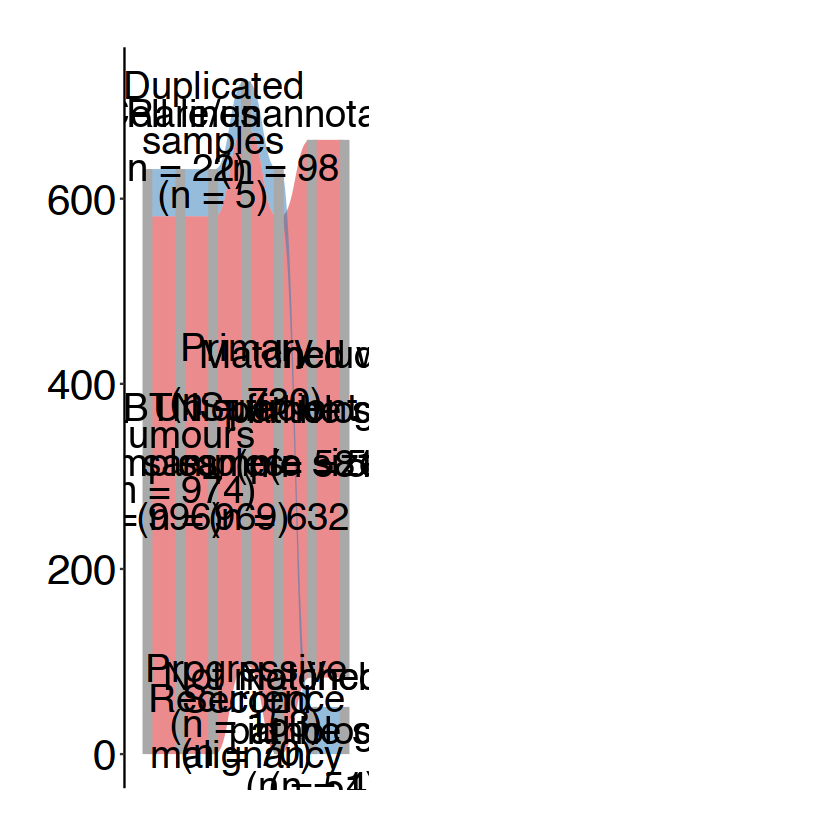

In [102]:
p_plot

In [103]:
pdf(paste0(plotpath, "CBTN_alluvial.pdf"),
   width = 30, height = 10,
   useDingbats = FALSE)
p_plot
   
dev.off()

pdf 
  2